In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from PIL import Image 
import numpy.polynomial.polynomial as poly

%matplotlib inline


In [3]:
cd /Users/austinmcdonald/Desktop/FirstBa/Batest

/Users/austinmcdonald/Desktop/FirstBa/Batest


In [10]:
files = os.listdir()
#files = files[1:]
files = files[1:25]
files[0]

'BasmallImage6_00001.tif'

In [11]:
len(files)

24

In [ ]:
#files

In [ ]:
# 2 = 390->405
# 1 = 410->425
# 0 = 430->445
Xindex = 174 
Yindex = 84
Shape = 201
Row = int(5) # define the area to take around the spots
Col = int(5) # define the area to take around the spots
xvs = np.arange(0,Shape)
DataS=np.zeros(Shape**2).reshape((Shape,Shape))
IMG = dict()
ct = 0
p=0
DataSub = np.zeros(Shape**2).reshape((Shape,Shape))
for q in range(0,len(files)):
    Images = np.array(Image.open(files[q]))
    ImageB = []
    for x in range(0,Shape):
        coefs = poly.polyfit(xvs, Images[x], 11) # fits 11th order poly 
        ffit  = poly.polyval(xvs, coefs)
        hold  = Images[x]-(ffit)
        hold[hold < 0] = 0        # replaces negtive values form the sub with 0
        ImageB.append(hold)
    DataSub += ImageB 
    ct += 1
    if ct > 2:
        p+=1
        ct = 0
        IMG[p] = (np.array(DataSub)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])/2
        DataSub = np.zeros(Shape**2).reshape((Shape,Shape))
    
#DataF = (np.array(ImageB)[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])/len(files)
#DataF = (DataS[Yindex-Row:Yindex+Row+1,Xindex-Col:Xindex+Col+1])/len(files)



In [13]:
IMG[8].max()

2360.9977143082119

In [36]:
aa= np.linspace(0,2500,10, endpoint=True)
aa

array([    0.        ,   277.77777778,   555.55555556,   833.33333333,
        1111.11111111,  1388.88888889,  1666.66666667,  1944.44444444,
        2222.22222222,  2500.        ])

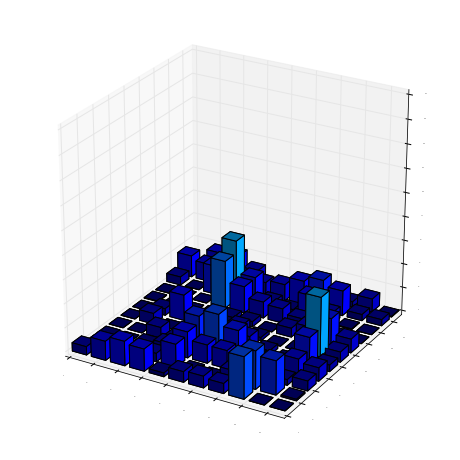

In [91]:
from mpl_toolkits.mplot3d import Axes3D

#data = IMG[8]
data = IMG[12]

###########

##########
ypos, xpos  = np.indices(data.shape) 

xpos = xpos.flatten()*160  
ypos = ypos.flatten()*160
zpos = np.zeros(xpos.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(data.flatten()/float(2400))
#colors = plt.cm.jet(data.flatten()/float(dd))

ax.bar3d(xpos,ypos,zpos, 120,120,data.flatten(), color=colors)

#ax.text(1200, 1600, 2300, "T = 0s", color='red', fontsize=50)

ax.set_zlim(0, 2500)
plt.xlim(0,1700)
plt.ylim(0,1700)
plt.xticks(fontsize = 0)
plt.yticks(fontsize = 0)
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_zticks(aa)
ax.tick_params(axis='z', length=6, width=2, colors='k',labelsize=0)

ax.view_init(elev=25., azim=300)

#plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/OFF-BA.png',dpi=400)

plt.show()